# A. Introduction

# B. Import Libraries

In [3]:
# Untuk menonaktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

from dython.nominal import associations

# Library For DataFrame
import pandas as pd
import numpy as np

# Library for Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(["seaborn"])
import seaborn as sns
import plotly.express as px

# Library for Analysis
import scipy
import sympy as sp
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud,STOPWORDS

# C. Data Loading

Import Dataset

In [11]:
# Membaca data dan menampilkan data
df = pd.read_csv("rideshare_kaggle.csv")
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
import os


In [6]:
os.getcwd()

'C:\\Users\\ASUS\\Downloads\\MBKM\\Project data science\\Final Project\\PYTN_KampusMerdeka_fp1_Monica Belinda'

In [7]:
os.chdir('C:\\Users\\ASUS\\Downloads\\MBKM')

In [8]:
os.getcwd()

'C:\\Users\\ASUS\\Downloads\\MBKM'

In [12]:
# Membaca data dan menampilkan data
df = pd.read_csv("rideshare_kaggle.csv")
df.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [13]:


# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))



Data tersebut memiliki jumlah baris 693071 dan kolom berjumlah 57


In [14]:


# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [15]:


#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()



,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544049e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,7.056569e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.550000e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [16]:


# Mengecek missing values dan hanya menampilkan column yang memiliki missing values dengan jumlah missing valuesnya
df.isnull().sum()[df.isnull().sum() > 0]



price    55095
dtype: int64

In [17]:


# Mengecek data duplikat
df.duplicated().sum()



0

In [18]:


# Melihat nilai unique pada data
df.nunique()



id                             693071
timestamp                       31196
hour                               24
day                                17
month                               2
datetime                         5977
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

# D. Data Cleaning
Handling Missing Values

In [19]:
# Melihat persentase missing values dari keseluruhan data
print(round((55095/len(df)*100), 2),'%')

7.95 %


In [20]:
# Menghapus baris yang terdapat missing values
df_clean = df.dropna()

# Melihat total baris dan kolom pada df_clean
df_clean.shape

(637976, 57)

Drop Unnecessary Columns

In [21]:


# Mengecek nunique masing-masing columns, untuk columns yang memiliki semua data yang sama atau semua data yang berbeda 
print(df_clean.nunique()[df_clean.nunique() == 1])
print(df_clean.nunique()[df_clean.nunique() == len(df_clean)])



timezone    1
dtype: int64
id    637976
dtype: int64


In [22]:
# Data pada column "name" dan "product_id" sama, sehingga salah satu column akan di drop
df_clean[['name','product_id']].value_counts()

name          product_id                          
Black SUV     6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
UberXL        6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
WAV           9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
Black         6c84fd89-3f11-4782-9b50-97c468b19529    55095
UberX         55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
UberPool      997acbb5-e102-41e1-b155-9df7de0a73f2    55091
Lux           lyft_premier                            51235
Lux Black     lyft_lux                                51235
Lux Black XL  lyft_luxsuv                             51235
Lyft          lyft                                    51235
Lyft XL       lyft_plus                               51235
Shared        lyft_line                               51233
dtype: int64

In [23]:
# Kemudian akan dilakukan drop columns pada columns tersebut ("timezone","id","product_id"). Serta columns yang tidak dibutuhkan seperti "timestamp" dan "datetime" (karena sudah ada column "day", "month"). 
df = df_clean.drop(["timezone","id","timestamp","datetime","product_id"],axis=1)

In [24]:


df.head()



,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [25]:
# Melihat total baris dan kolom pada df
df.shape

(637976, 52)

# Label Encode for Columns with object dtype

In [26]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap column
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df.select_dtypes(include='object')
df_encode = df.copy()

for column in df_category.columns:
    df_encode[column] = label_encoder.fit_transform(df_category[column])

# Select Columns with Highest Correlation

In [27]:
%pip install dython

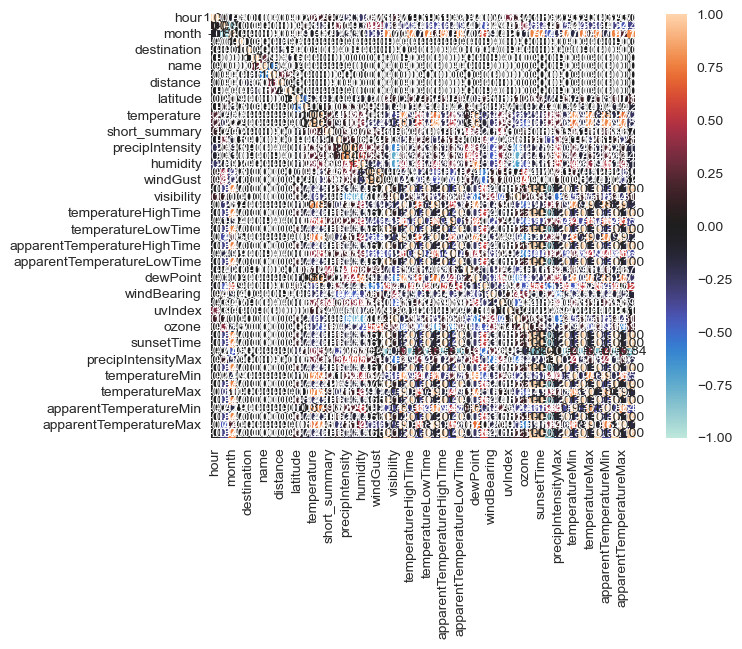

In [28]:


# Untuk mengetahui korelasi masing-masing columns
corr = associations(df_encode)



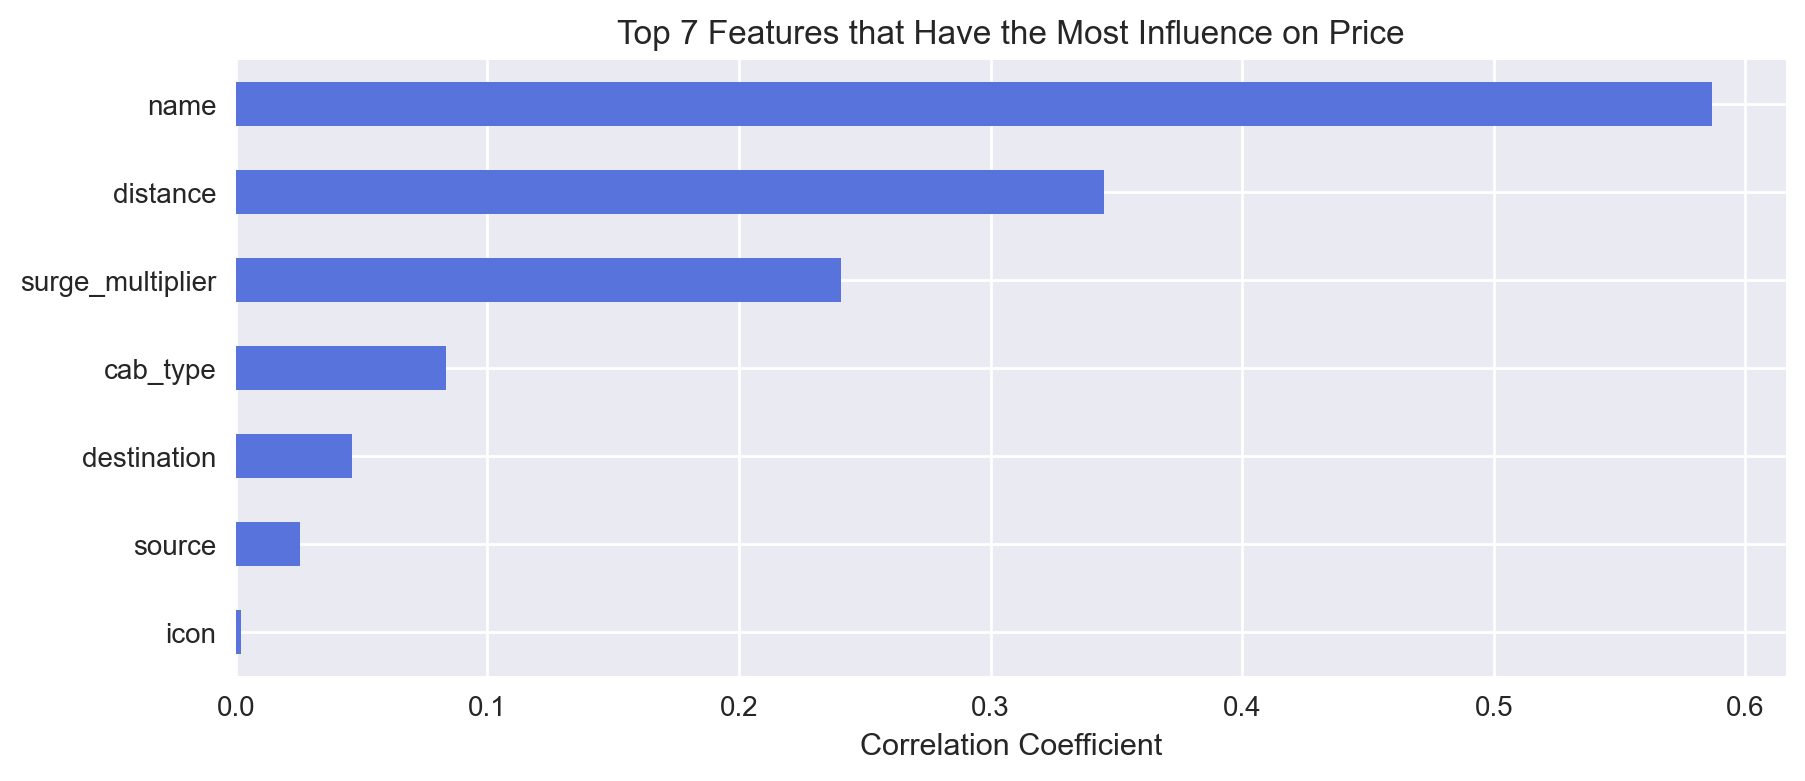

In [29]:
# Menampilkan 7 columns dengan korelasi tertinggi
top_7_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(7)
fig = plt.figure(figsize=(10,4),dpi=200)
top_7_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("Top 7 Features that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

In [30]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(15,10)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="PuBu", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

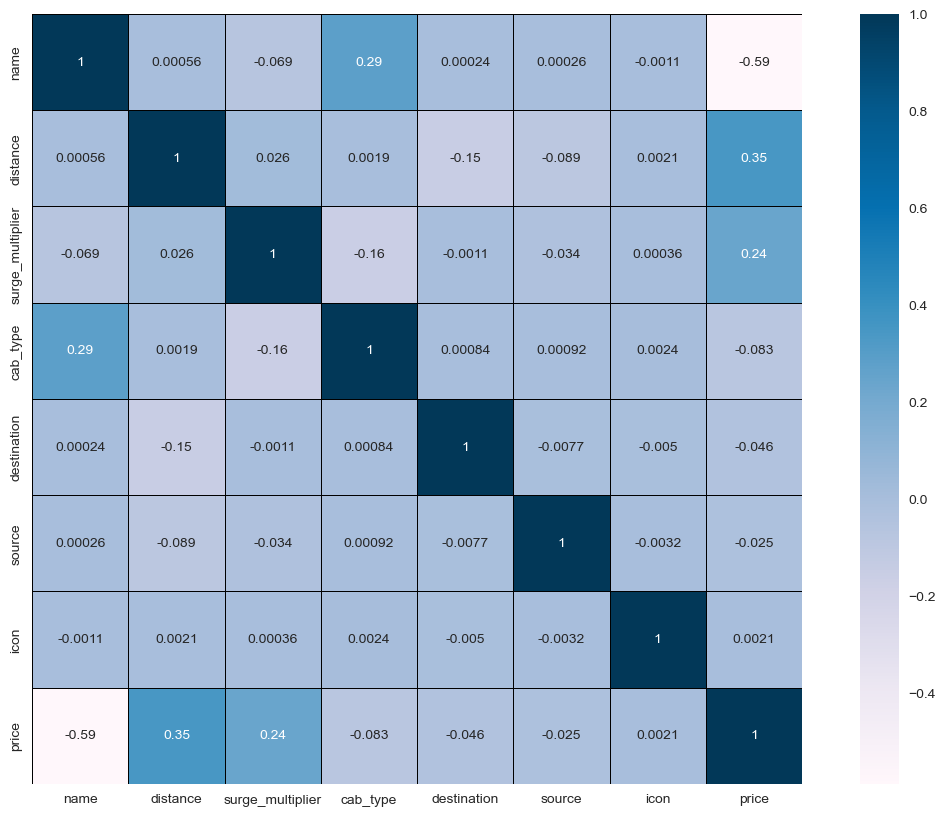

In [31]:


heatmap = ['name', 'distance', 'surge_multiplier', 'cab_type', 'destination','source', 'icon','price']
heat_map(df_encode,heatmap)



In [32]:
# Data hanya berisi 7 column dengan korelasi terhadap price yang tertinggi.
df = df[['name', 'distance', 'surge_multiplier', 'cab_type', 'destination','source', 'icon','price']]

# Removing Outliers

In [33]:
price_q1 = df["price"].describe().loc["25%"]
price_q3 = df["price"].describe().loc["75%"]
price_iqr = price_q3 - price_q1

price_lower_limit = price_q1 - (1.5 * price_iqr)
price_upper_limit = price_q3 + (1.5 * price_iqr)

df = df[(df["price"] >= price_lower_limit) & (df["price"] <= price_upper_limit)].copy()

# Exploration Data Analysis
Which One is More Popular? Uber or Lyft?

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


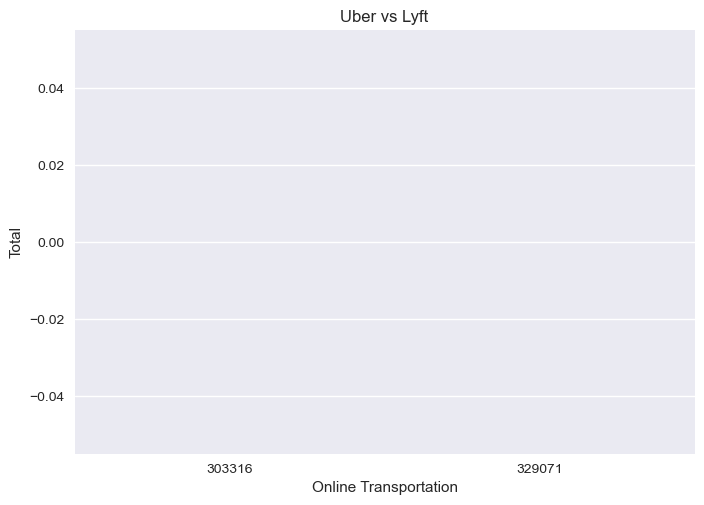

In [34]:

import warnings
warnings.filterwarnings('ignore')

from dython.nominal import associations

df_transport_name = df['cab_type'].value_counts()
df_transport_name = pd.DataFrame(df_transport_name, columns=['cab_type', 'count']).reset_index()

x = df_transport_name['cab_type']
y = df_transport_name['count']

ax = sns.barplot(x=x, y=y) 
plt.xlabel('Online Transportation') 
plt.ylabel('Total') 
plt.title('Uber vs Lyft') 
for i, v in enumerate(y): 
    ax.text(i, v + 0.2, str(v), ha='center') 
plt.show()


# Place with Most Pick-ups (Source and Destination)

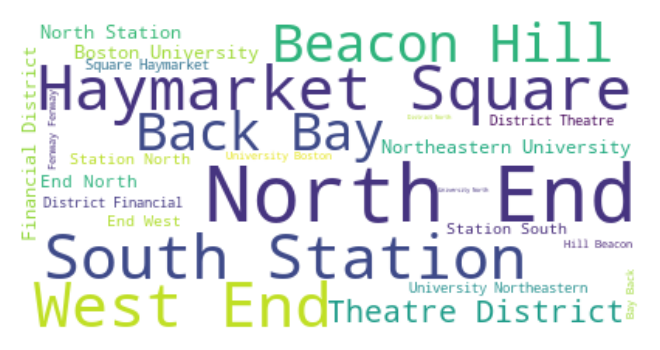

In [35]:
stopwords = set(STOPWORDS)
plt.figure(figsize=(4,4),dpi=200)
source_wordcloud = WordCloud(background_color='white',
                             stopwords=stopwords).generate(' '.join(df['source']))
plt.imshow(source_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

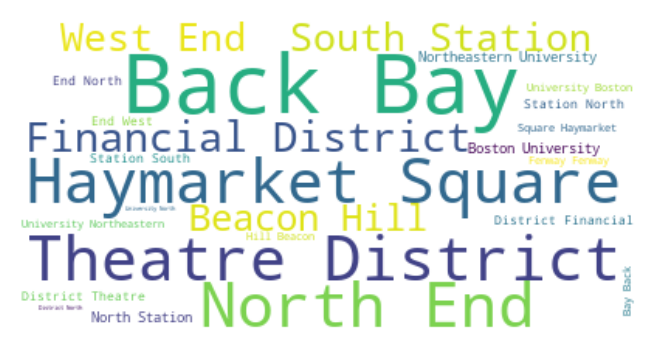

In [36]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

plt.figure(figsize=(4,4),dpi=200)
destination_wordcloud = WordCloud(background_color='white',
                             stopwords=stopwords).generate(' '.join(df['destination']))
plt.imshow(destination_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# How Distances Affect Price

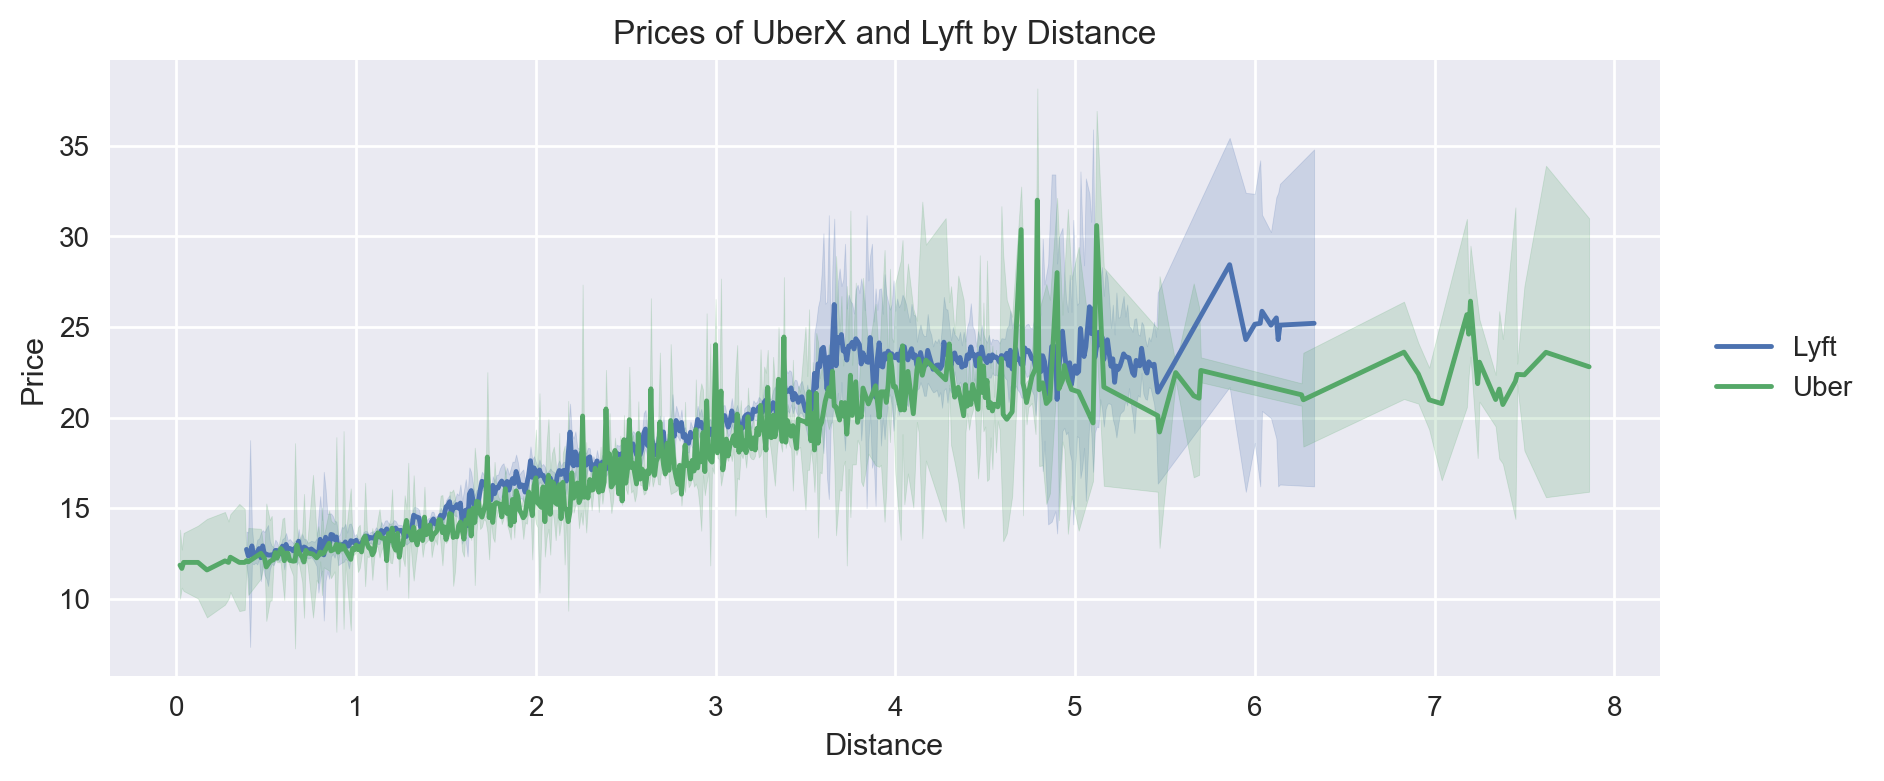

In [37]:


plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=df,x="distance",y="price",hue="cab_type")
plt.title("Prices of UberX and Lyft by Distance")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()



# Do Weathers Influence Surge Multiplier Price?

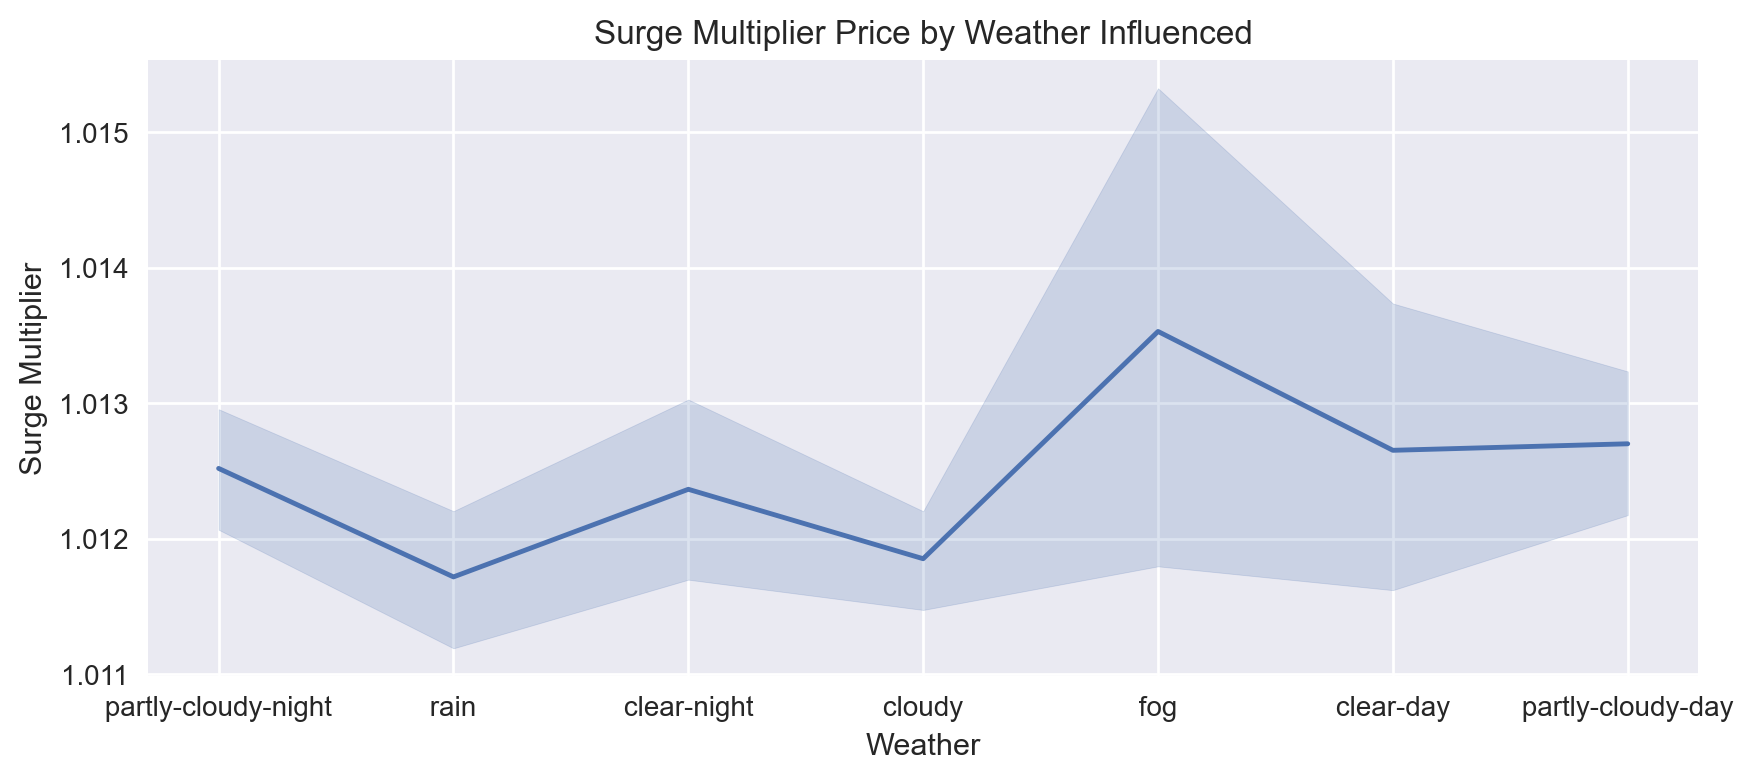

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=df,x="icon",y="surge_multiplier")
plt.title("Surge Multiplier Price by Weather Influenced")
plt.xlabel("Weather")
plt.ylabel("Surge Multiplier")
plt.show()

In [39]:
surge_price = df.pivot_table(index='surge_multiplier', columns=['name', 'cab_type'], values='price', fill_value=0)
surge_price.index = surge_price.index.map(int)
surge_price

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,Uber,Uber,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Uber,Uber,Uber,Uber
surge_multiplier,,,,,,,,,,,,
1,20.487195,29.859943,17.113552,22.178923,30.684030,9.281424,14.735208,6.029893,8.7525,9.764453,15.642382,9.764398
1,0.000000,0.000000,21.495038,27.825400,36.443516,11.509698,18.482634,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.000000,0.000000,26.178536,32.132503,39.268000,13.731984,22.579467,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.000000,0.000000,29.231626,34.272727,0.000000,15.655992,26.056936,0.000000,0.0000,0.000000,0.000000,0.000000
2,0.000000,0.000000,31.262438,36.006276,0.000000,17.331658,28.118734,0.000000,0.0000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,22.519481,33.327586,0.000000,0.0000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,29.750000,41.000000,0.000000,0.0000,0.000000,0.000000,0.000000


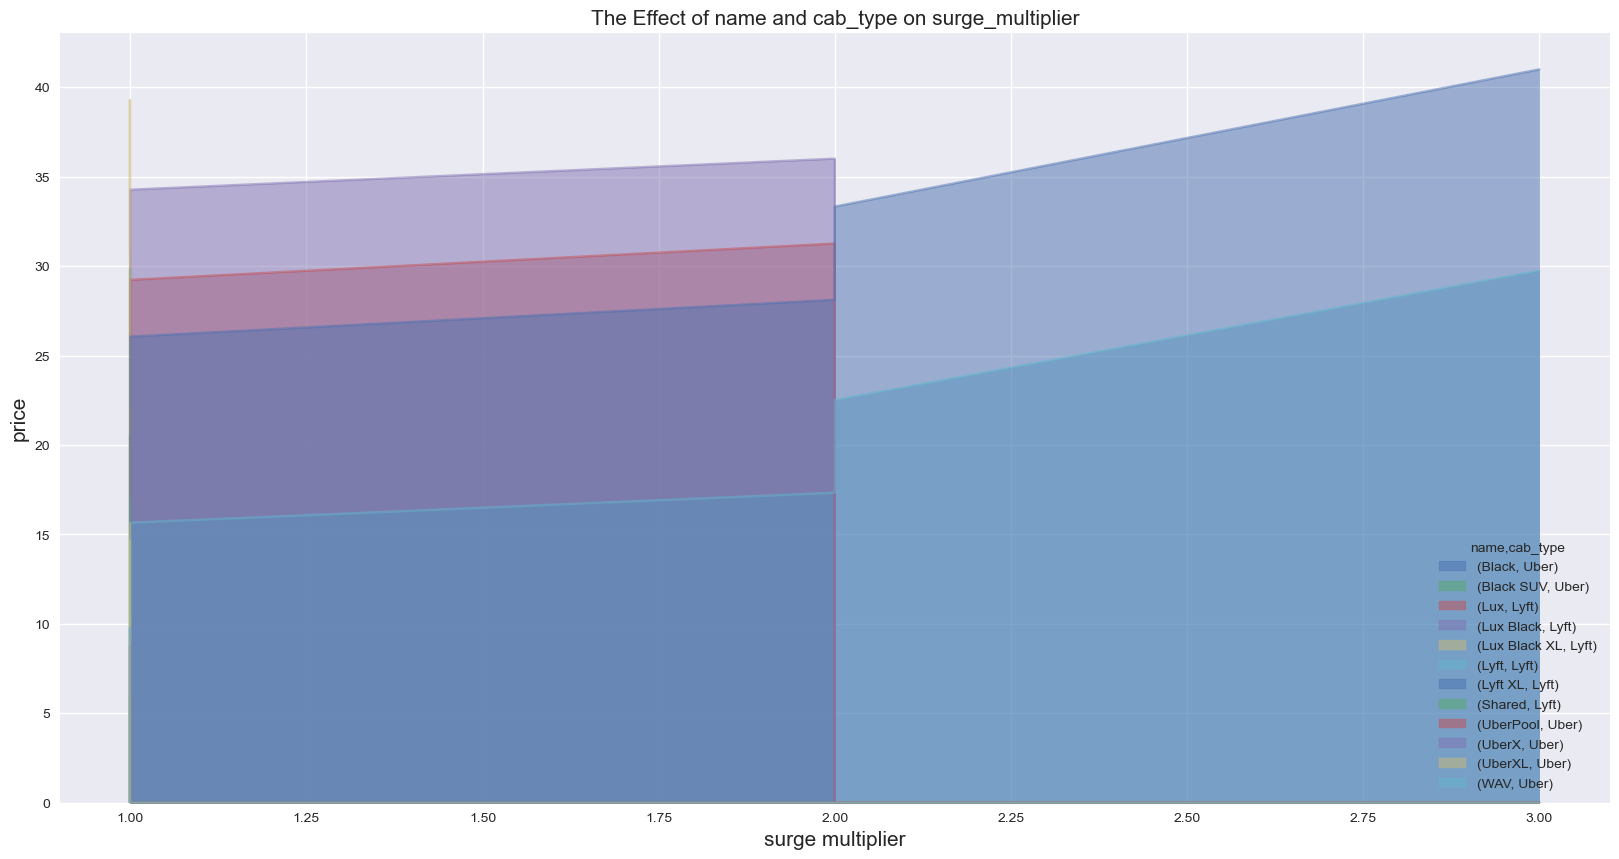

In [40]:
surge_price.plot(kind='area',
                stacked=False,
                figsize=(20,10)
                )
plt.title('The Effect of name and cab_type on surge_multiplier', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xlabel('surge multiplier', fontsize=15)

plt.show()

In [41]:
df = df[['name', 'distance', 'surge_multiplier', 'cab_type', 'destination','source', 'icon','price']]
df

,name,distance,surge_multiplier,cab_type,destination,source,icon,price
0,Shared,0.44,1.0,Lyft,North Station,Haymarket Square,partly-cloudy-night,5.0
1,Lux,0.44,1.0,Lyft,North Station,Haymarket Square,rain,11.0
2,Lyft,0.44,1.0,Lyft,North Station,Haymarket Square,clear-night,7.0
3,Lux Black XL,0.44,1.0,Lyft,North Station,Haymarket Square,clear-night,26.0
4,Lyft XL,0.44,1.0,Lyft,North Station,Haymarket Square,partly-cloudy-night,9.0
...,...,...,...,...,...,...,...,...
693065,WAV,1.00,1.0,Uber,North End,West End,partly-cloudy-night,9.5
693066,UberXL,1.00,1.0,Uber,North End,West End,partly-cloudy-night,13.0
693067,UberX,1.00,1.0,Uber,North End,West End,partly-cloudy-night,9.5
693069,Black SUV,1.00,1.0,Uber,North End,West End,partly-cloudy-night,27.0


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.copy().drop("price",axis=1).apply(le.fit_transform)
y = df.copy()["price"]

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1221)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 442670
Testing dataset		: 189717


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Models Definition & Training

In [46]:
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()
base_model.fit(scaled_X_train,y_train)

LinearRegression()

In [47]:
base_pred = base_model.predict(scaled_X_test)

In [48]:
from sklearn.metrics import r2_score

r2_score(y_test,base_pred)

0.5006207928252248

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_2_X = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

In [50]:
poly_2_X_train,poly_2_X_test,y_train,y_test = train_test_split(poly_2_X,y,test_size=0.3,random_state=1221)

scaled_poly_2_X_train = scaler.fit_transform(poly_2_X_train)
scaled_poly_2_X_test = scaler.transform(poly_2_X_test)

In [51]:
poly_2_model = LinearRegression()
poly_2_model.fit(scaled_poly_2_X_train,y_train)

LinearRegression()

In [52]:
poly_2_pred = poly_2_model.predict(scaled_poly_2_X_test)

In [53]:
r2_score(y_test,poly_2_pred)

0.5435116794524921

# Models Evaluation

In [54]:
poly_3_X = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)
poly_3_X_train,poly_3_X_test,y_train,y_test = train_test_split(poly_3_X,y,test_size=0.3,random_state=1221)

scaled_poly_3_X_train = scaler.fit_transform(poly_3_X_train)
scaled_poly_3_X_test = scaler.transform(poly_3_X_test)


poly_3_model = LinearRegression()
poly_3_model.fit(scaled_poly_3_X_train,y_train)

poly_3_pred = poly_3_model.predict(scaled_poly_3_X_test)
r2_score(y_test,poly_3_pred)

0.7046036882777749

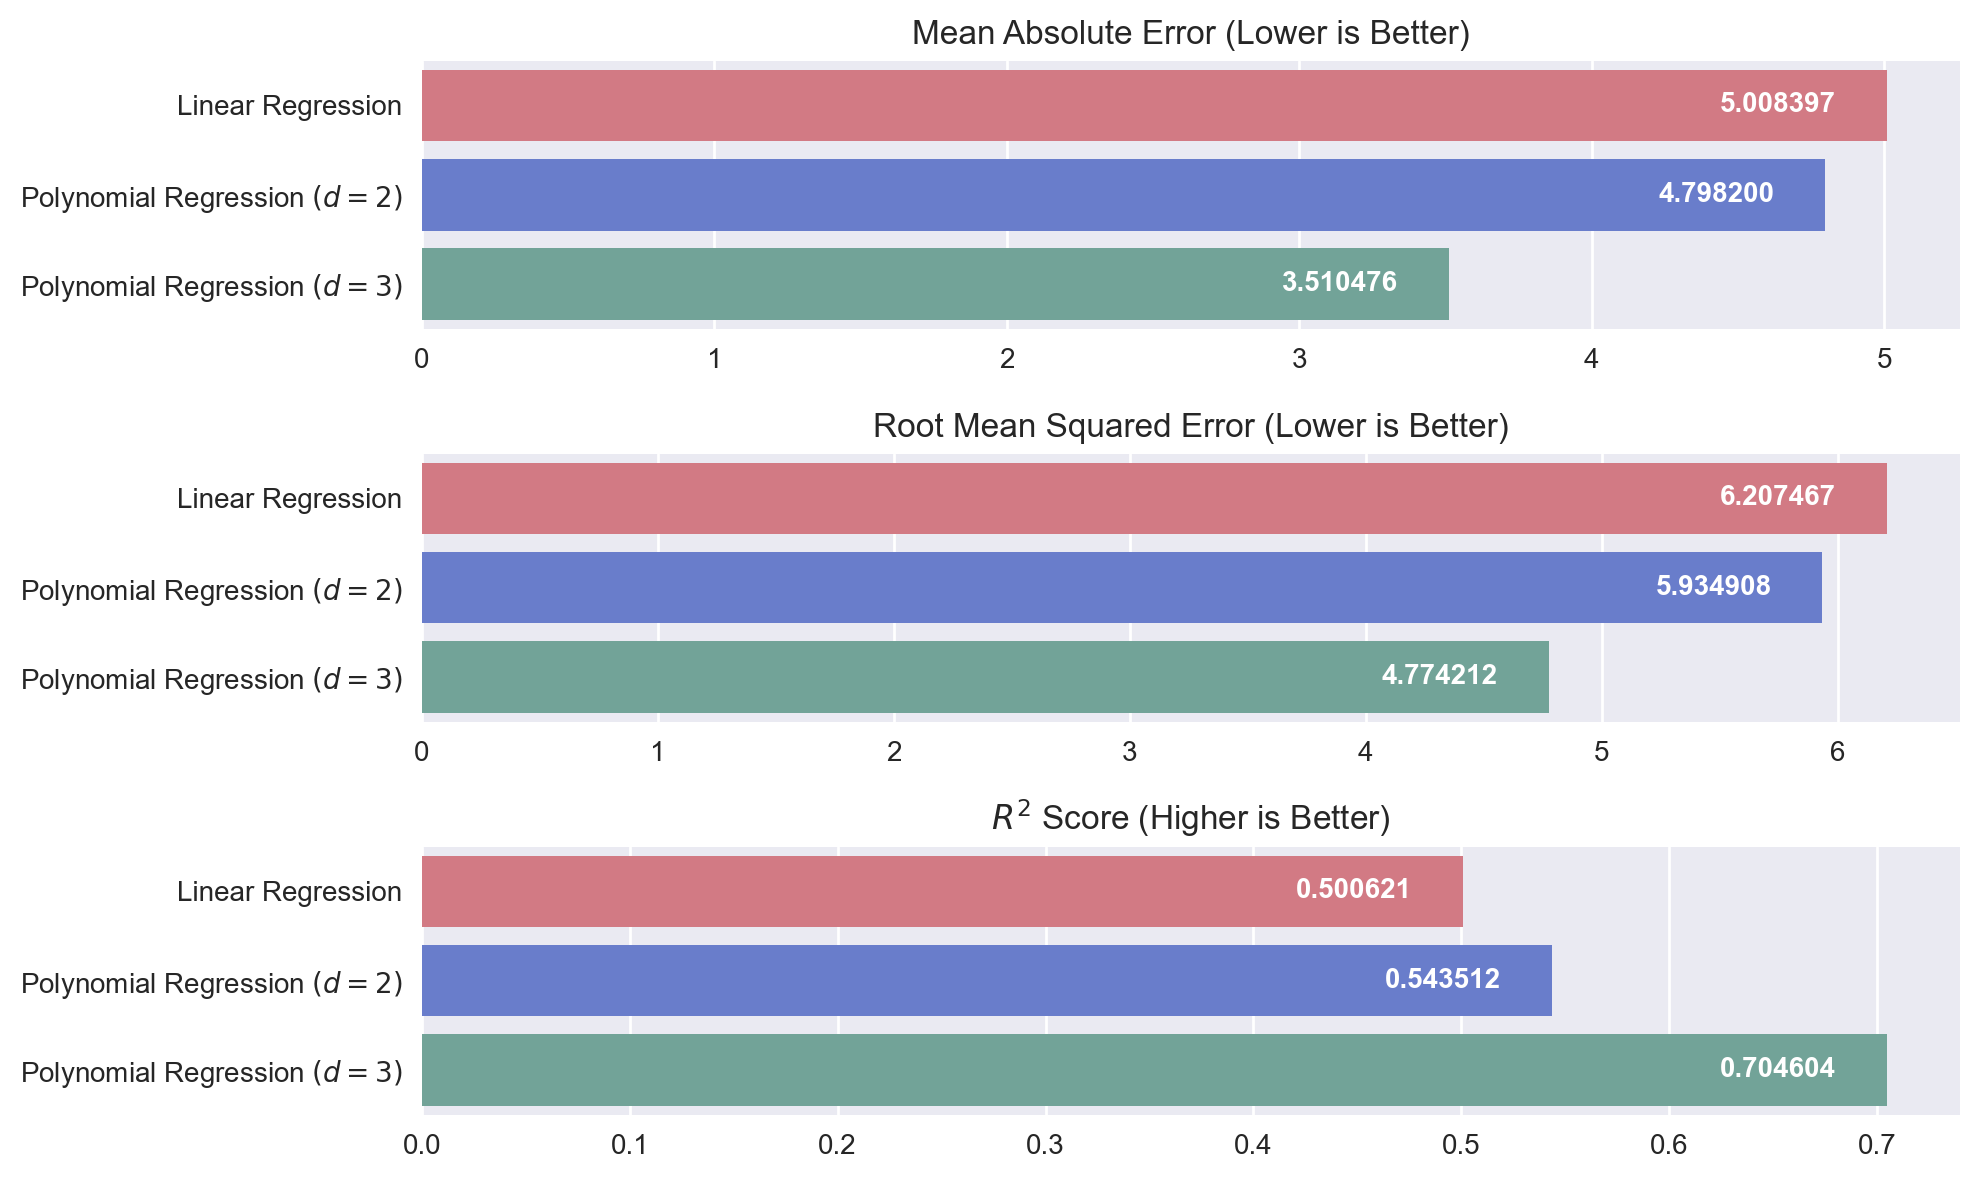

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_test,base_pred),mean_absolute_error(y_test,poly_2_pred),mean_absolute_error(y_test,poly_3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_test,base_pred)),np.sqrt(mean_squared_error(y_test,poly_2_pred)),np.sqrt(mean_squared_error(y_test,poly_3_pred))],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_test,base_pred),r2_score(y_test,poly_2_pred),r2_score(y_test,poly_3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()